# Oscilador	Duffing	

## Importando librerías a usar 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['figure.figsize'] = (14, 10)

In [2]:
# Oscilador Duffing

print(' Oscilador Duffing ')

# Parametros
omega = 1
gamma = 0.15
a = 0.3
b = 0.25

x = -1
v = 1
xv = [x, v]
dt=0.1

# Ecuacion de Duffing
def dxvdt(t, xv):
    dxdt = xv[1]
    dvdt = - gamma * xv[1] + 2 * a * xv[0] - 4 * b * xv[0]**3
    dvdt += a * np.cos(omega * t)
    return [dxdt, dvdt]


# tiempo de integración
t = 0.0
t_max = 100.0
# Guardando la data
file_name = 'data.tsv'
file = open(file_name, "w")
file.write(str(t) + '\t' + str(xv[0]) + '\t' + str(xv[1]) + '\n')

# Loop de integracion
while t < t_max:
    # Funcion de Integracion por el Metodo de Runge-Kutta a 4o orden
    k1 = [ dt * d for d in dxvdt(t, xv) ]
    xv_step = [ xv[i] + k1[i] / 2 for i in range(2) ]
    k2 = [ dt * d for d in dxvdt(t + 0.5 * dt, xv_step) ]
    xv_step = [ xv[i] + k2[i] / 2 for i in range(2) ]
    k3 = [ dt * d for d in dxvdt(t + 0.5 * dt, xv_step) ]
    xv_step = [ xv[i] + k3[i] for i in range(2) ]
    k4 = [ dt * d for d in dxvdt(t + dt, xv_step) ]
    for i in range(2):
        xv[i] += (k1[i] + 2 * k2[i] + 2 * k3[i] + k4[i]) / 6.0
    t += dt
    file.write(str(t) + '\t' + str(xv[0]) + '\t' + str(xv[1]) + '\n')

file.close()
print('Output in file:', file_name)        

 Duffing Oscillator Simulation 
Output in file: data.tsv


In [3]:
col = ['time','pos','vel']
data = pd.read_csv('data.tsv',sep='\t',names=col)
data.head()

,time,pos,vel
0,0.0,-1.000000,1.000000
1,0.1,-0.897644,1.043409
2,0.2,-0.791977,1.067081
3,0.3,-0.684712,1.076217
4,0.4,-0.577055,1.075677


## Gráficas

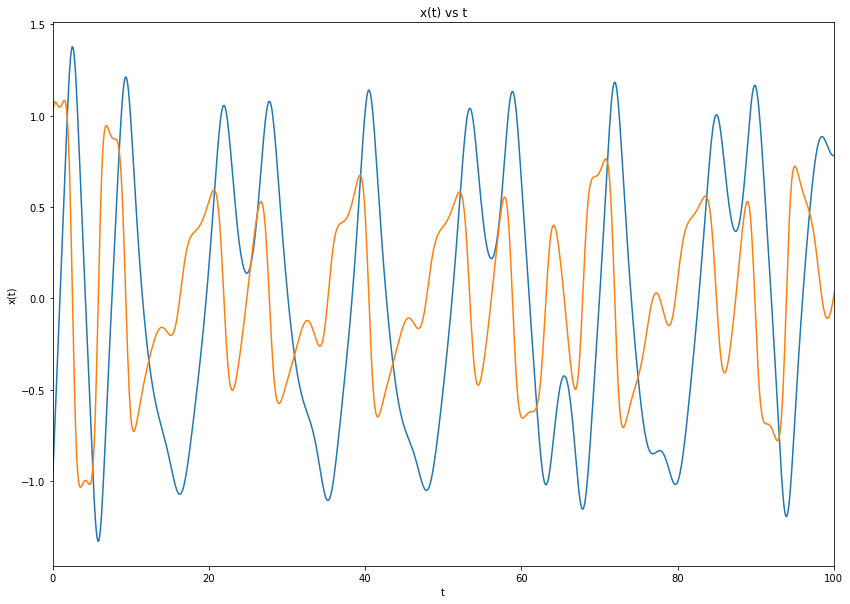

In [4]:
t=data['time']
x = data['pos']
y = data['vel']

plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("x(t) vs t")
plt.xlim([0,100])
plt.plot(t, x, t, y)
plt.show()

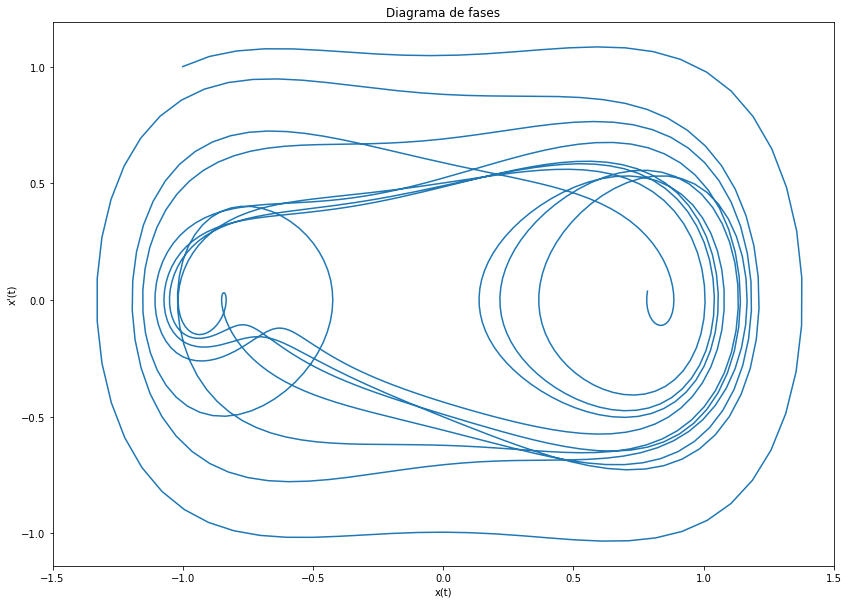

In [5]:
plt.xlabel("x(t)")
plt.ylabel("x'(t)")
plt.title('Diagrama de fases')
plt.xlim([-1.5,1.5])
plt.plot(x, y)
plt.show()

## Estabilidad del Método Runge-Kutta

Consideremos el problema de valor inicial:

$$
u' = \lambda u,  \lambda \in \ \mathbb{C} \hspace{2cm} (1)
$$
$$
u(0) = 1 \hspace{2cm} (2)
$$

Dado un método numérico para EDO's si $u_n$ denota la aproximación a la solución de (1) en tiempo $t_n$ con paso $h > 0$ constante, entonces definimos la región de estabilidad $R$ como:

$$
R = \{z = \lambda h \in \mathbb{C}: u_n \rightarrow 0\}
$$

Para el método de euler tenemos:

$$
u_{n+1} = u_n +hf(t_n,u_n) = u_n(1+\lambda h ) = (1+\lambda h)^{n+1}
$$

de esto tenemos $R_{euler} = \{ z\in \mathbb{C} : |1+z| < 1  \}$

Suponiendo que tenemos el método RK(A,b) dado mediante las fórmulas:

$$
U_i = u_n + h \sum_{j=1}^s a_{ij}f(t_n+c_jh,U_j), i=1,\cdots,s, 
$$

$$
u_{n+1} = u_n +  h \sum_{j=1}^s b_{j}f(t_N+c_jh,U_j)
$$

Para el problema (1), nos quedaría:

$$
U_i = u_n + \lambda h AU \hspace{2cm} (3)
$$

$$
u_{n+1} = u_n + \lambda h b^T U \hspace{2cm} (4)
$$

Introduciendo (3) en (4) tenemos:

$$
u_{n+1} = (1+ \lambda h b^T ( I-\lambda h A)^{-1} e
$$